# Experiments with EPRL Melon extrapolation

## Setup

In [1]:
# set Plot style
using Plots
using Plots.PlotMeasures
using LaTeXStrings

# set backend and style
pgfplotsx()
theme(:default)
default(
    markerstrokewidth = 0.2,
    markerstrokealpha = 0,
    grid = :true,
    gridlinewidth = 0.5,
    fontfamily="Computer Modern",
    framestyle=:box,
    size=(800,300),
    margin=5Plots.mm
)
scalefontsizes(1.7)

In [2]:
using CSV, DataFrames, HalfIntegers, JupyterFormatter

In [3]:
DIAGRAM = "self_energy";
BASE_DATA_DIRECTORY = "../../data";
MODEL = "EPRL";

In [4]:
function get_data(filename)

    data = vec(
        Matrix(
            DataFrame(
                CSV.File(
                    "$(BASE_DATA_DIRECTORY)/$(DIAGRAM)/jb_0.5/exact/$(MODEL)/immirzi_0.1/NEW_EXTRAPOLATION/Dl_MAX_10/$(filename).csv",
                ),
            ),
        ),
    )

    data

end

get_data (generic function with 1 method)

## Plot of the new data

In [5]:
W_Dl = get_data("Dl_cutoff_10")
W_Dl_m1 = get_data("Dlm1_cutoff_10")
W_Dl_m2 = get_data("Dlm2_cutoff_10")

W_1 = get_data("W1_cutoff_10")
W_2 = get_data("W2_cutoff_10")
W_3_10_shell = get_data("W3_cutoff_10")
W_4_10_shell = get_data("W4_cutoff_10");

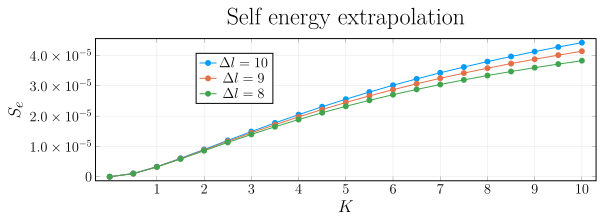

In [6]:
plotib0 = plot(
    0.0:0.5:10,
    [W_Dl[:], W_Dl_m1[:], W_Dl_m2[:]],
    label = [L"\Delta l = 10" L"\Delta l = 9" L"\Delta l = 8"],
    xlabel = L"K",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.2, 0.9),
)

## Analyze the old data - Full amplitude extrapolation

In [79]:
data_20_shell = Matrix(DataFrame(CSV.File("$(BASE_DATA_DIRECTORY)/$(DIAGRAM)/jb_0.5/exact/$(MODEL)/immirzi_0.1/Divergences_table_imm_0.1_20_SHELLS.csv")));

Quick check that the amplitude is slowly converging with increasing number of shells

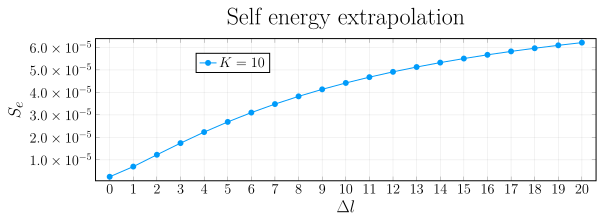

In [80]:
plotib0 = plot(
    0.0:20.0,
    data_20_shell[20,:],
    label = [L"K=10"],
    xlabel = L"\Delta l",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 0:1:20,
    legend = (0.2, 0.9),
)

In [81]:
function make_lambda(data)
    (data[3:end] .- data[2:end-1]) ./ (data[2:end-1] .- data[1:end-2])
end

make_lambda (generic function with 1 method)

Check that the sequence $A_{se}(K,\Delta l)$ is linearly convergent. We compute the ratios $\lambda_K(\Delta l)$ and infer that the limit $\Delta l \to \infty$ is finite and smaller than 1.

In [82]:
lambda20 = make_lambda(data_20_shell[20,:]);
lambda15 = make_lambda(data_20_shell[15,:]);
lambda10 = make_lambda(data_20_shell[10,:]);

plotib0 = Plot{Plots.PGFPlotsXBackend() n=3}


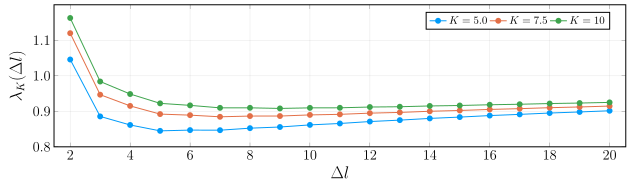

In [83]:
plotib0 = plot(
    2.0:20.0,
    [   lambda10,
        lambda15,
        lambda20,
    ],
    label = [ L"K=5.0" L"K=7.5" L"K=10"],
    xlabel = L"\Delta l",
    ylabel = L"\lambda_K(\Delta l)",
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 0:2:20,
    ylim = (0.8, 1.20),
    size = (900, 300),
    legend = (0.65, 0.95),
    legend_column = -1,
    legendfontsize=11,
    yguidefontsize=16,
    xguidefontsize=16,
    #palette = palette([:skyblue, :purple], 3)
)

savefig(plotib0,"./plots/EPRL/self_energy/SE_lambda_K.svg")

@show plotib0

All the ratios $\lambda_K(\Delta l)$ seems to converge in the limit $\Delta l \to \infty$ to a value smaller than 1.

In [84]:
function extrapolate(dataDl,dataDlm1,dataDlm2)
    dataDl - (dataDl - dataDlm1)^2/(dataDl - 2*dataDlm1 + dataDlm2);
end

extrapolate (generic function with 1 method)

We extrapolate the amplitude using $\Delta l = 10$ and $\Delta l = 20$ 

In [85]:
extrapolation_end_Dl10 = extrapolate.(data_20_shell[:, 11],data_20_shell[:, 10],data_20_shell[:, 9]);
extrapolation_end_Dl20 = extrapolate.(data_20_shell[:, 21],data_20_shell[:, 20],data_20_shell[:, 19]);

In [86]:
extrapolation_end_Dl20[end]/extrapolation_end_Dl10[end]

1.0571725127166085

The two extrapolations differ by 5.7% only. Seems a good compromise given the amount of resources necessary to obtain the value of the amplitude with $\Delta l =20$. 

plotib0 = Plot{Plots.PGFPlotsXBackend() n=4}


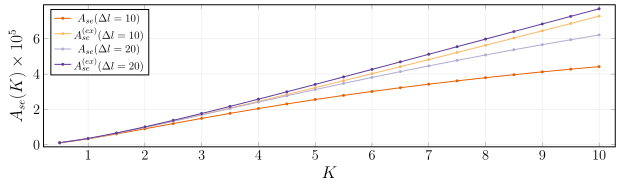

In [90]:
plotib0 = plot(
    0.5:0.5:10.0,
    [10^5 .*data_20_shell[:, 11],
    10^5 .*extrapolation_end_Dl10,
     10^5 .*data_20_shell[:, 21],
     10^5 .*extrapolation_end_Dl20],
    label = [L"A_{se}(\Delta l=10)" L"A_{se}^{(ex)}(\Delta l=10)" L"A_{se}(\Delta l=20)" L"A_{se}^{(ex)}(\Delta l=20)"],
    xlabel = L"K",
    ylabel = L"A_{se}(K) \times 10^5",
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    markersize = 2,
    xticks = 0:1:10,
    size = (900, 300),
    legend = (0.012, 0.97),
    legendfontsize=11,
    yguidefontsize=16,
    xguidefontsize=16,
    # legend_column = -1, 
    #seriescolor = [palette(:default)[1] RGBA(16.0/255,96.0/255,244.0/255,1) palette(:default)[2] RGBA(226.0/255,77.0/255,36.0/255,1)],
    palette = :PuOr_4
    
)

savefig(plotib0,"./plots/EPRL/self_energy/SE_EPRL_extrapolations_comparison.svg")

@show plotib0

In [16]:
extrapolation_end_Dl10[end]/data_20_shell[end, 11]

1.646935082321286

You can see that the improvement given by the extrapolation if we start from the amplitude with a truncation $\Delta l =10$ is huge (+65%).

## Testing the extrapolation layer by layer

We start by creating the layer vectors (`layers[2*k]` is the vector corresponding to the layer $k$ --half-integer-- containing the value of the layer for all the truncations $\Delta l$)

In [43]:
layers = [data_20_shell[k, :] .- data_20_shell[k-1, :] for k=2:20];
pushfirst!(layers, data_20_shell[1, :]);

We check the linear convergence hypotesis looking at the ratios for layer

In [44]:
llambda20 = make_lambda(layers[20]);
llambda15 = make_lambda(layers[15]);
llambda10 = make_lambda(layers[10]);

plotib0 = Plot{Plots.PGFPlotsXBackend() n=3}


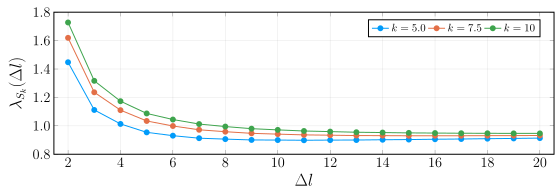

In [45]:
plotib0 = plot(
    2.0:20.0,
    [   llambda10,
        llambda15,
        llambda20,
    ],
    label = [ L"k=5.0" L"k=7.5" L"k=10"],
    xlabel = L"\Delta l",
    ylabel = L"\lambda_{S_k}(\Delta l)",
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 0:2:20,
    ylim = (0.8, 1.8),
    legend_column = -1, 
    legend = (0.628, 0.95),
    legendfontsize=11,
    yguidefontsize=16,
    xguidefontsize=16,
    #palette = palette([:skyblue, :purple], 3)
)

savefig(plotib0,"./plots/EPRL/self_energy/SE_lambda_K_Sk.svg")

@show plotib0

All three the layers are compatible with the hypothesis of linear convergence. BUT, in all the cases $\lambda_K(\Delta l)$ is decreasing. This means that increasing the truncation the extrapolation of the layer decrease in value. Moreover, for $K=10$ and $\Delta l = 10$ we can observe that we are still far away from the region where $\lambda_K$ reaches the horizontal asymptote. We expect the extrapolation to change if we increase the truncation from $\Delta l =10$. We see that it is not the case for lower levels $K=5$. 

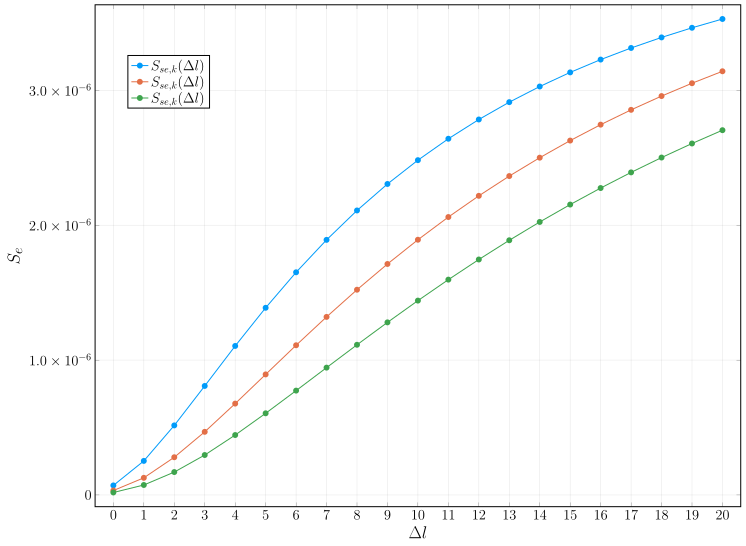

In [46]:
plotib0 = plot(
    0:20,
    [layers[10],layers[15],layers[20]],
    labels = [L"S_{se,k}(\Delta l)"],
    xlabel = L"\Delta l",
    ylabel = L"S_e",
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 0:20,
    legend = (0.05, 0.9),
    size=(1000,800)
)

The convergence of the layer $K=10$ is very slow.

We extrapolate anyway!

In [47]:
extrapolated_layers_Dl10 = [extrapolate(layers[k][11],layers[k][10],layers[k][9]) for k=1:20];
extrapolated_layers_Dl20 = [extrapolate(layers[k][21],layers[k][20],layers[k][19]) for k=1:20];

If we plot the extrapolation of the layers we see immediately that for the last layer $K=10$ the extrapolation at $\Delta l =10$ is way larger than the extrapolation $\Delta l =20$. As we expected. Smiliarly for lower layers $K=5$ the extrapolation at $\Delta l =10$ is smaller and very similar to $\Delta l =20$.

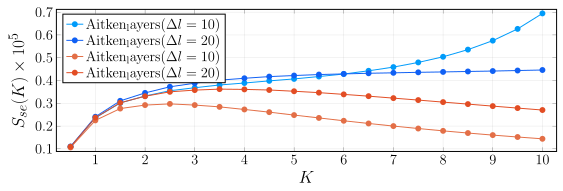

In [48]:
plotib0 = plot(
    0.5:0.5:10.0,
    [10^5*extrapolated_layers_Dl10,
     10^5*extrapolated_layers_Dl20,
     10^5*[layers[k][11] for k=1:20],
     10^5*[layers[k][21] for k=1:20],
     ],
    label = [L"\mathrm{Aitken_layers} (\Delta l =10)" L"\mathrm{Aitken_layers} (\Delta l =20)"],
    xlabel = L"K",
    ylabel = L"S_{se}(K) \times 10^5",
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 0:1:10,
    legend = (0.012, 0.97),
    seriescolor = [palette(:default)[1] RGBA(16.0/255,96.0/255,244.0/255,1) palette(:default)[2] RGBA(226.0/255,77.0/255,36.0/255,1)],
)

We sum the layers to find the amplitude given by the sum of the extrapolated layers

In [49]:
extrapolated_amplitude_layers_Dl10 = [sum(extrapolated_layers_Dl10[1:k]) for k=1:20];
extrapolated_amplitude_layers_Dl20 = [sum(extrapolated_layers_Dl20[1:k]) for k=1:20];

plotib0 = Plot{Plots.PGFPlotsXBackend() n=4}


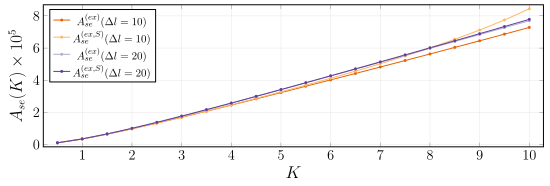

In [78]:
plotib0 = plot(
    0.5:0.5:10.0,
    [10^5 *extrapolation_end_Dl10,
     10^5 *extrapolated_amplitude_layers_Dl10,
     10^5 *extrapolation_end_Dl20,
     10^5 *extrapolated_amplitude_layers_Dl20],
    label = [L"A_{se}^{(ex)} (\Delta l =10)" L"A_{se}^{(ex, S)} (\Delta l =10)" L"A_{se}^{(ex)} (\Delta l =20)" L"A_{se}^{(ex, S)} (\Delta l =20)"],
    xlabel = L"K",
    ylabel = L"A_{se}(K) \times 10^5",
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    markersize = 2,
    xticks = 0:1:10,
    legend = (0.012, 0.97),
    legendfontsize=11,
    yguidefontsize=16,
    xguidefontsize=16,
    #seriescolor = [palette(:default)[1] RGBA(16.0/255,96.0/255,244.0/255,1) palette(:default)[2] RGBA(226.0/255,77.0/255,36.0/255,1)],
    #palette = :Paired_4
    palette = :PuOr_4
)

savefig(plotib0,"./plots/EPRL/self_energy/SE_EPRL_extrapolations_comparison_layers.svg")

@show plotib0

In [85]:
extrapolated_amplitude_layers_Dl10[end]/extrapolation_end_Dl10[end]

1.1592348120532059

In [86]:
extrapolated_amplitude_layers_Dl20[end]/extrapolation_end_Dl20[end]

1.0112883874913383

We see that the amplitude given by the sum of the extrapolated layers with trucation $\Delta l =10$ is larger than the amplitude with trucation $\Delta l =20$. Moreover the extrapolation of the amplitude with $\Delta l = 20$ computed layer by layer is almost identical to the extrapolation of the whole amplitude.

In [87]:
extrapolated_layers_Dl = [[extrapolate(layers[k][dl],layers[k][dl-1],layers[k][dl-2]) for k=1:20] for dl=3:21];
extrapolated_amplitude_layers_Dl_K10 = [sum(extrapolated_layers_Dl[dl]) for dl=1:19];

Value of the extrapolation of the amplitude at cutoff $K=10$ computed with different truncations.

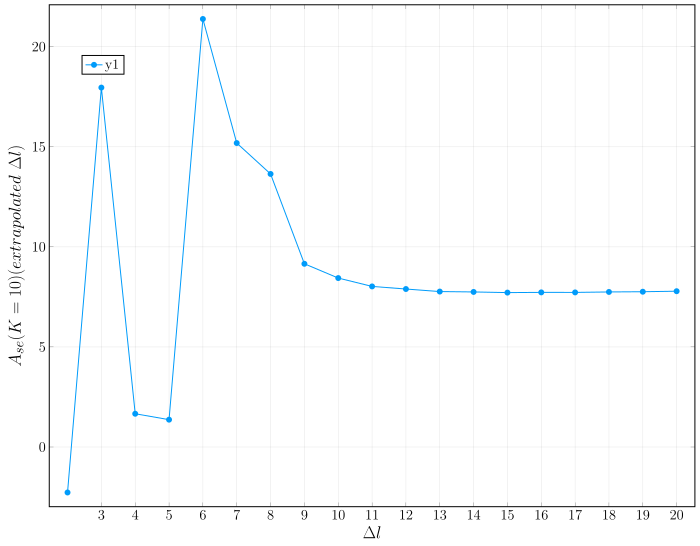

In [26]:
plotib0 = plot(
    2:20,
    10^5*extrapolated_amplitude_layers_Dl_K10,
    xlabel = L"\Delta l",
    ylabel = L"A_{se}(K=10)(extrapolated\ \Delta l)",
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 3:20,
    legend = (0.05, 0.9),
    size=(1000,800)
)

In [27]:
extrapolated_amplitude_layers_Dl_K10[end]

7.784342953045635e-5

In [28]:
extrapolated_amplitude_layers_Dl_K10[end-10]

8.440583935344501e-5

# Other tests

In [18]:
using JupyterFormatter
using DataFrames, CSV, HalfIntegers, JLD2, Distributions, Random

In [19]:
using Statistics
using StatsBase
using StatsPlots
using LaTeXStrings

In [20]:
pgfplotsx()
theme(:default)
default(
    markerstrokewidth = 0,
    markerstrokealpha = 0,
    grid = :true,
    gridlinewidth = 0.5,
    fontfamily="Computer Modern",
    framestyle=:box,
    size=(800,300),
    margin=5Plots.mm
)
scalefontsizes(1.7)

In [21]:
BASE_DATA_DIRECTORY = "../../data";

function get_data(Dl,mu,trial)
    DataFrame(
        CSV.File(
            "$(BASE_DATA_DIRECTORY)/self_energy/jb_0.5/monte_carlo/Nmc_100000/EPRL/immirzi_0.1/Dl_$(Dl)/weight_$(mu)/ib_0/ampls_cutoff_10_trial_$(trial).csv",
        ),
    )
end

get_data (generic function with 2 methods)

In [22]:
function get_SE_amplitudes(Dl,mu)

layers_trials = DataFrame()

for trial in 1:20
    layers_trials[!,"$(trial)"]=[get_data(Dl,mu,trial).amp[id] - get_data(Dl,mu,trial).amp[id-1] for id in 2:21]
end

layers_average =  [mean(row) for row in eachrow(layers_trials)];
layers_variance =  [var(row) for row in eachrow(layers_trials)];
amplitude_Nmc100K = [sum(layers_average[1:id]) for id in 1:20];
error_Nmc100K = sqrt.([sum(layers_variance[1:id]) for id in 1:20]);

return amplitude_Nmc100K, error_Nmc100K
    
end

get_SE_amplitudes (generic function with 1 method)

In [23]:
function extrapolate(dataDl, dataDlm1, dataDlm2)
    dataDl - (dataDl - dataDlm1)^2/(dataDl - 2*dataDlm1 + dataDlm2);
end

extrapolate (generic function with 1 method)

In [24]:
function make_lambda(data)
    (data[3:end] .- data[2:end-1]) ./ (data[2:end-1] .- data[1:end-2])
end

make_lambda (generic function with 1 method)

In [40]:
mu = 1.0

ampls_Dl = zeros(21,11)
errors_Dl = zeros(21,11) 

for Dl = 0:10

    ampls_Dl[1] = 0.0
    errors_Dl[1] = 0.0
    
    amplitude_Nmc100K_Dl, error_Nmc100K_Dl = get_SE_amplitudes(Dl,mu)

    ampls_Dl[2:end,Dl+1] .= 10^(17) .* amplitude_Nmc100K_Dl[:]
    errors_Dl[2:end, Dl+1] .= 10^(17) .* error_Nmc100K_Dl[:]
    
end

ampl_extrap_Dl_8 = zeros(21)
ampl_extrap_Dl_8[1] = 0.0
ampl_extrap_Dl_8[2:end] .= extrapolate.(ampls_Dl[2:end,end-2],ampls_Dl[2:end,end-3],ampls_Dl[2:end,end-4]);

ampl_extrap_Dl_9 = zeros(21)
ampl_extrap_Dl_9[1] = 0.0
ampl_extrap_Dl_9[2:end] .= extrapolate.(ampls_Dl[2:end,end-1],ampls_Dl[2:end,end-2],ampls_Dl[2:end,end-3]);

ampl_extrap_Dl_10 = zeros(21)
ampl_extrap_Dl_10[1] = 0.0
ampl_extrap_Dl_10[2:end] .= extrapolate.(ampls_Dl[2:end,end],ampls_Dl[2:end,end-1],ampls_Dl[2:end,end-2]);

lambda10 = zeros(8)
lambda7 = zeros(8)
lambda4 = zeros(8)

lambda10 = make_lambda(ampls_Dl[21,:]);
lambda7 = make_lambda(ampls_Dl[15,:]);
lambda4 = make_lambda(ampls_Dl[9,:]);

plot1 = Plot{Plots.PGFPlotsXBackend() n=6}


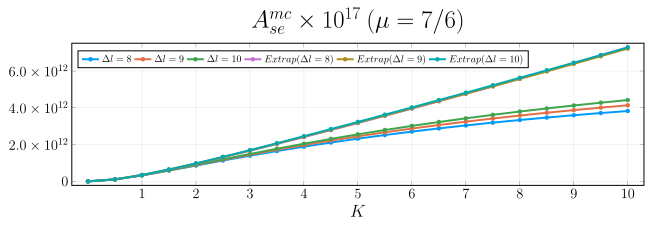

In [41]:
plot1 = plot(0:0.5:10,
    [#ampls_Dl[:, 1], ampls_Dl[:, 2], ampls_Dl[:, 3], ampls_Dl[:, 4], ampls_Dl[:, 5], ampls_Dl[:, 6], ampls_Dl[:, 7], ampls_Dl[:, 8],
        ampls_Dl[:, 9], ampls_Dl[:, 10], ampls_Dl[:, 11], ampl_extrap_Dl_8[:], ampl_extrap_Dl_9[:], ampl_extrap_Dl_10[:]],
               label = [L"\Delta l=8" L"\Delta l=9" L"\Delta l=10" L"Extrap(\Delta l=8)" L"Extrap(\Delta l=9)" L"Extrap(\Delta l=10)"],
               markershape = [:circle :circle :circle],
               shape = [:circle :circle :circle],
               xticks = 1:1:10,
               size = (900, 300),
               #ylim = (0.6,0.82),
               #yticks = [0, 0.4, 0.8],
               #ylabel = L"A_{se}^{mc} \times 10^{17}",
               xlabel = L"K",
               #yerror = [errors_Dl[:, 1], errors_Dl[:, 2], errors_Dl[:, 3], errors_Dl[:, 4], errors_Dl[:, 5], 
               #          errors_Dl[:, 6], errors_Dl[:, 7], errors_Dl[:, 8], errors_Dl[:, 9], errors_Dl[:, 10], errors_Dl[:, 11]],
               markerstrokewidth = 1.5,
               linewidth=2,
               markersize = 3,
               legend_column = -1,
               title = L"A_{se}^{mc} \times 10^{17} \hspace{2mm} (\mu = 7/6)",
               legend = (0.01, 0.95),
               legendfontsize=10,
               yguidefontsize=16,
               xguidefontsize=16,
               )

savefig(plot1,"./plots/EPRL/self_energy/SE_EPRL_extrap_experiment_mu_$(mu).svg")

@show plot1

plotib0 = Plot{Plots.PGFPlotsXBackend() n=3}


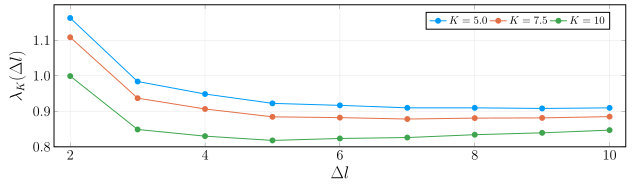

In [42]:
plotib0 = plot(
    2.0:10.0,
    [   lambda10,
        lambda7,
        lambda4,
    ],
    label = [ L"K=5.0" L"K=7.5" L"K=10"],
    xlabel = L"\Delta l",
    ylabel = L"\lambda_K(\Delta l)",
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 0:2:20,
    ylim = (0.8, 1.20),
    size = (900, 300),
    legend = (0.65, 0.95),
    legend_column = -1,
    legendfontsize=11,
    yguidefontsize=16,
    xguidefontsize=16,
    #palette = palette([:skyblue, :purple], 3)
)

savefig(plotib0,"./plots/EPRL/self_energy/SE_lambda_K_mu_$(mu).svg")

@show plotib0